# Dynamique de la prévisibilité dans le GCMG

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

###### 1 - Implémentation

In [35]:
def GCMC(N_s,N_p,T,epsilon):

    a = np.random.choice([1, -1], size=(N_s, P))
    U = np.zeros(N_s)
    omega_mu = np.random.normal(0,np.sqrt(N_p),P)
    A = np.zeros(T)
    mus = np.zeros(T).astype(int)

    mus[0] = np.random.randint(P) % P

    for t in range(T - 1):

        n = U > 0
        A[t] = omega_mu[mus[t]] + (a[:,mus[t]] @ n)
        U = U - a[:,mus[t]] * A[t] - epsilon
        mus[t + 1] =  (2 * mus[t]) % P + (A[t] > 0)
        
    return A,mus

In [36]:
N_s = 10 #nombre de spéculateurs
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre d'autres agents
epsilon = 0.01
T = int((200 * P) / epsilon) * 2

start = time.time()
A,mus = GCMC(N_s,N_p,T,epsilon)
print(f'Time : {round(time.time() - start,4)} s')

Time : 7.379 s


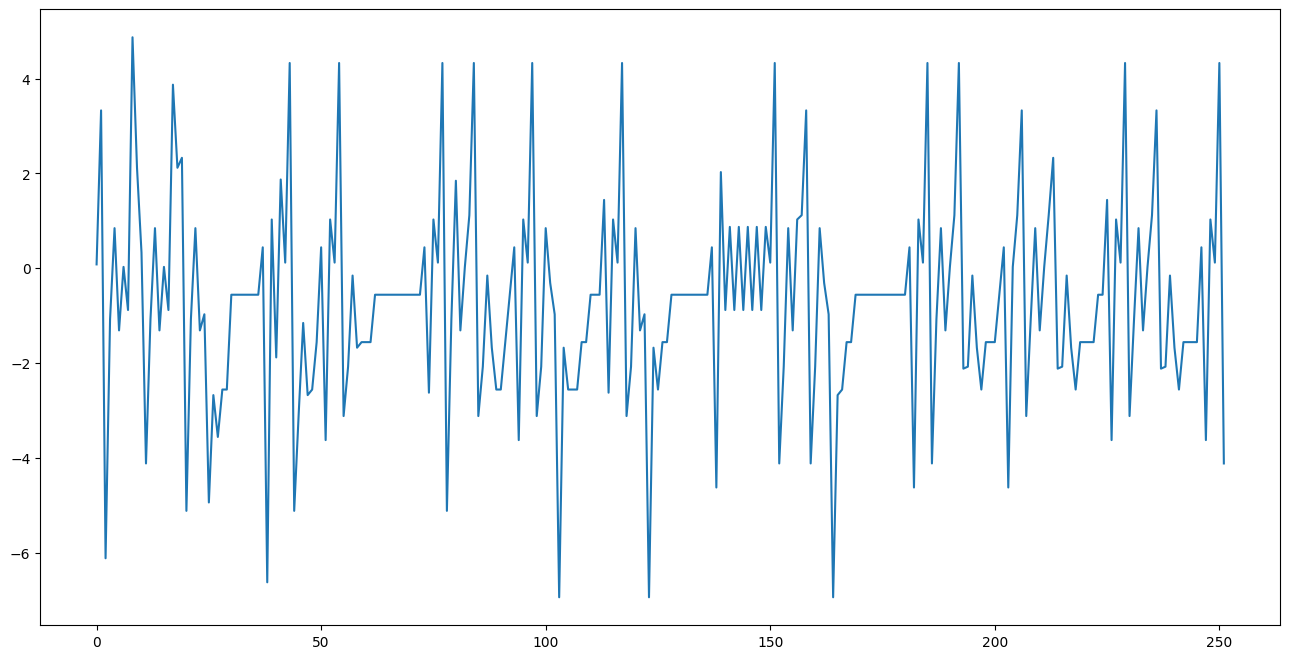

In [37]:
plt.figure(figsize=(16,8))
plt.plot(A[:252])
plt.show()

In [38]:
print(f"Amplitude :{np.round(max(A))}")
print(f"Standard deviation :{np.round(np.std(A))}")

Amplitude :5.0
Standard deviation :2.0


###### 2 Rôle des paramètres sur la dynamique

###### 2 Rôle des paramètres sur la dynamique

1. Trouvez des paramètres qui produisent des grandes fluctuations de A.

In [6]:
N_s = 1000 #nombre de spéculateurs
M = 4 #nombre de pas
P = 2 ** M
N_p = 1000 #nombre d'autres agents
epsilon = 0.01
T = int((200 * P) / epsilon)

start = time.time()
A,mus = GCMC(N_s,N_p,T * 2,epsilon)
print(f'Time : {round(time.time() - start,4)} s')

Time : 9.2314 s


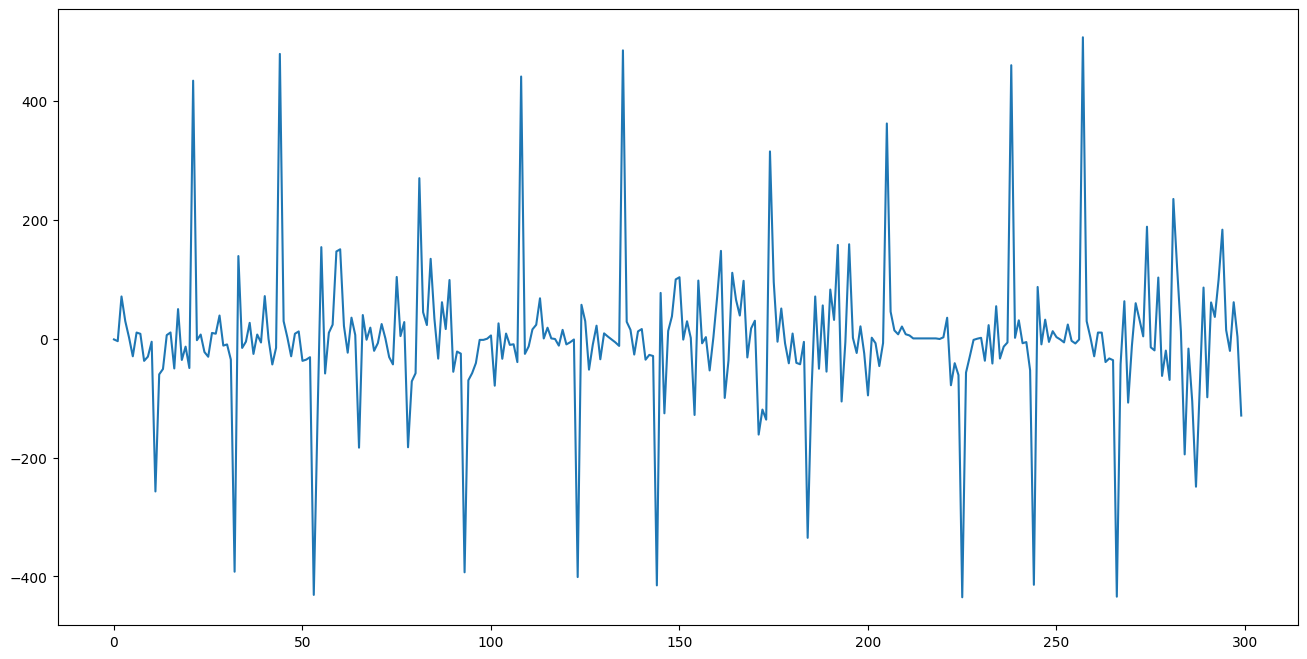

In [7]:
plt.figure(figsize=(16,8))
plt.plot(A[:300])
plt.show()

In [8]:
print(f"Amplitude :{np.round(max(A))}")
print(f"Standard deviation :{np.round(np.std(A))}")

Amplitude :507.0
Standard deviation :15.0


Plus il y a d'agents sur le marché (spéculateurs et producteurs), plus les fluctuations de A sont importantes.

2. Varier Np. Est-ce qu’augmenter Np stabilise ou déstabilise le marché? Pourquoi?

In [9]:
N_s = 10 #nombre de spéculateurs
M = 4 #nombre de pas
P = 2 ** M
epsilon = 0.01
T = int((200 * P) / epsilon)

N_p_range = [10,500,1000]
A_list  = []



start = time.time()
for N_p in N_p_range:
    
    A,mus = GCMC(N_s,N_p,T,epsilon)
    A_list.append(A)
    print(f"Amplitude :{np.round(max(A))}")
    print(f"Standard deviation :{np.round(np.std(A))}\n")
    
print(f'Time : {round(time.time() - start,4)} s')

Amplitude :5.0
Standard deviation :2.0

Amplitude :45.0
Standard deviation :21.0

Amplitude :25.0
Standard deviation :17.0

Time : 9.2764 s


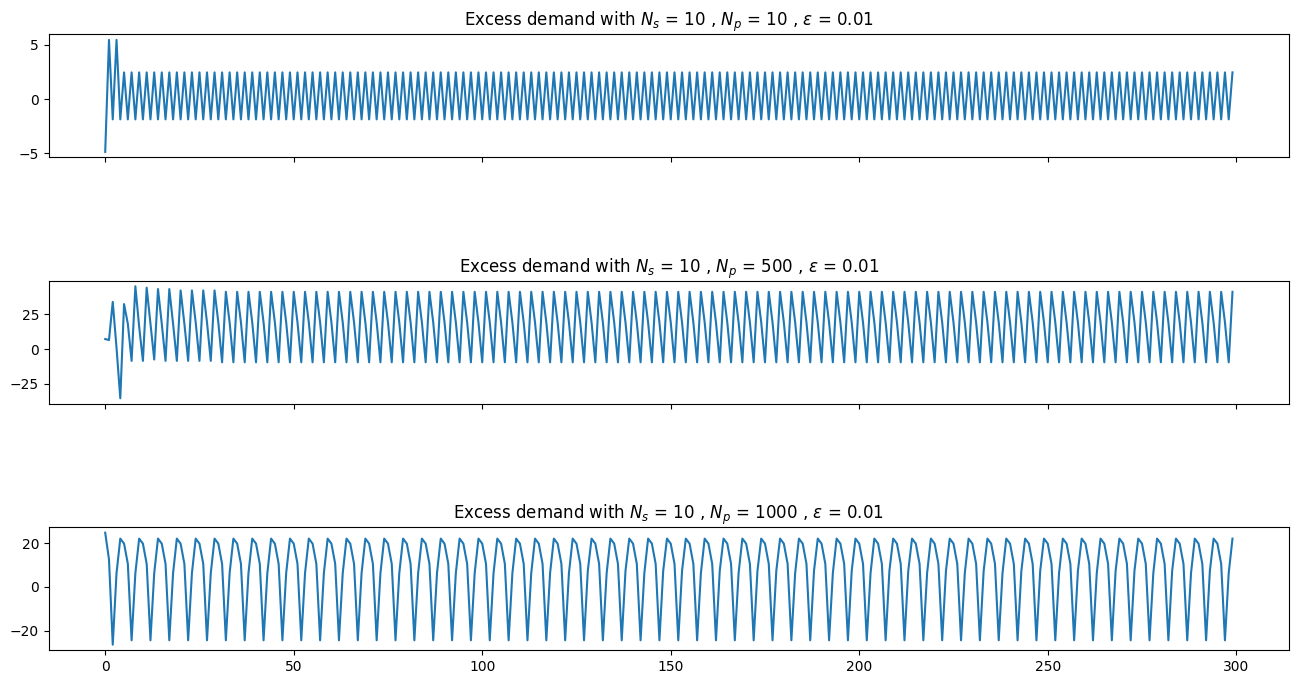

In [10]:
fig,ax = plt.subplots(len(N_p_range),figsize=(16,8), sharex=True)
fig.subplots_adjust(hspace=1)

for i,N_p in enumerate(N_p_range):
    ax[i].plot(A_list[i][:300])
    ax[i].set_title(f'Excess demand with $N_s$ = {N_s} , $N_p$ = {N_p} , $\epsilon$ = {epsilon}')

plt.show()

Augmenter $N_p$ stabilise le marché car plus il y a de producteurs face aux spéculateurs, plus la demande devient prévisible.
On obderve une périodicité de A de plus en plus régulière au fur et à mesure qu'on augmente $N_p$.

3. Varier Ns. Est-ce qu’augmenter Ns stabilise ou déstabilise le marché? Pourquoi?

In [11]:
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
epsilon = 0.01
T = int((200 * P) / epsilon)

N_s_range = [10,100,1000]
A_list  = []

start = time.time()
for N_s in N_s_range:
    A,mus = GCMC(N_s,N_p,T,epsilon)
    A_list.append(A)
    print(f"Amplitude :{np.round(max(A))}")
    print(f"Standard deviation :{np.round(np.std(A))}\n")
    
print(f'Time : {round(time.time() - start,4)} s')

Amplitude :11.0
Standard deviation :2.0

Amplitude :37.0
Standard deviation :2.0

Amplitude :479.0
Standard deviation :25.0

Time : 11.2699 s


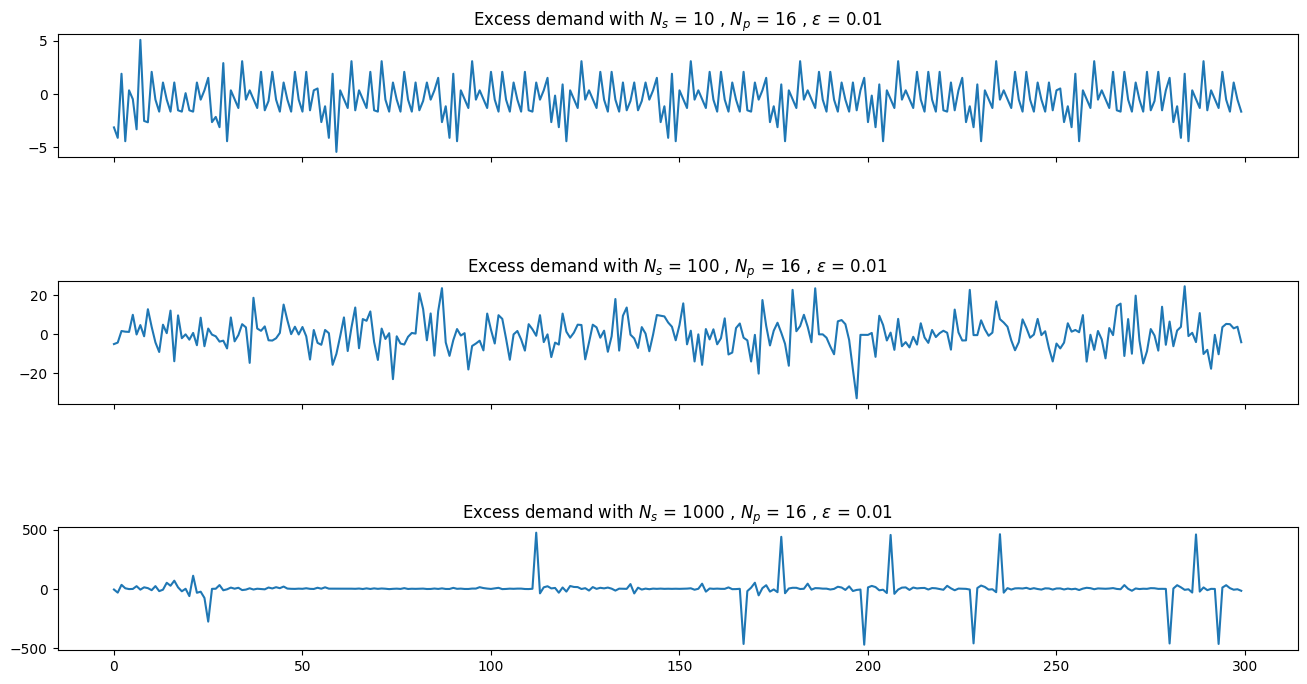

In [12]:
fig,ax = plt.subplots(len(N_s_range),figsize=(16,8), sharex=True)
fig.subplots_adjust(hspace=1)

for i,N_s in enumerate(N_s_range):
    ax[i].plot(A_list[i][:300])
    ax[i].set_title(f'Excess demand with $N_s$ = {N_s} , $N_p$ = {N_p} , $\epsilon$ = {epsilon}')

plt.show()

Augmenter $N_s$ déstabilise le marché car les mouvements deviennent moins prévisibles.
Il reste cependant certains pics de prévisibilité de la demande correspondant à la présence de producteurs sur le marché.

4. Varier ε. Est-ce que ce paramètre stabilise ou déstabilise le marché? Pourquoi? Comment interpréter
ce paramètre?

In [13]:
N_s = 10 #nombre de spéculateurs
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
#epsilon = 0.001

epsilon_range = [0.01,0.05,0.15,0.2]
A_list  = []

start = time.time()
for epsilon in epsilon_range:
    A,mus = GCMC(N_s,N_p,T,epsilon)
    A_list.append(A)
    print(f"Amplitude :{np.round(max(A))}")
    print(f"Standard deviation :{np.round(np.std(A))}\n")
    
print(f'Time : {round(time.time() - start,4)} s')

Amplitude :5.0
Standard deviation :3.0

Amplitude :4.0
Standard deviation :0.0

Amplitude :11.0
Standard deviation :3.0

Amplitude :11.0
Standard deviation :4.0

Time : 13.9985 s


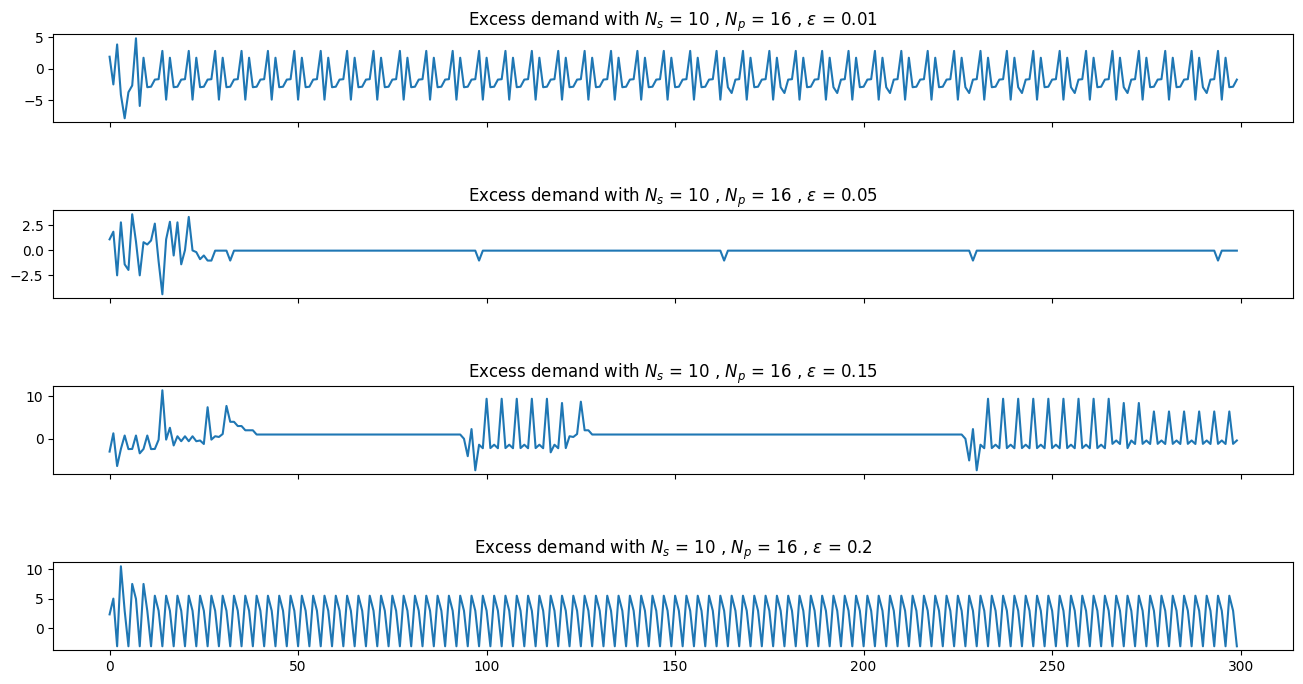

In [14]:
fig,ax = plt.subplots(len(epsilon_range),figsize=(16,8), sharex=True)
fig.subplots_adjust(hspace=1)

for i,epsilon in enumerate(epsilon_range):
    ax[i].plot(A_list[i][:300])
    ax[i].set_title(f'Excess demand with $N_s$ = {N_s} , $N_p$ = {N_p} , $\epsilon$ = {epsilon}')

plt.show()

$\epsilon$ représente est la performance minimale attendue de la stratégie pour qu'un investisseur joue sa stratégie. En augmentant le niveau d'attente, on observe une diminution de la demande.

###### 3 Dynamique de la prévisibilité

In [36]:
def GCMC(N_s,N_p,T,epsilon):

    a = np.random.choice([1, -1], size=(N_s, P))
    U = np.zeros(N_s)
    omega_mu = np.random.normal(0,np.sqrt(N_p),P)
    A = np.zeros(T)
    mus = np.zeros(T).astype(int)

    mus[0] = np.random.randint(P) % P

    for t in range(T - 1):

        n = U > 0
        A[t] = omega_mu[mus[t]] + (a[:,mus[t]] @ n)
        U = U - a[:,mus[t]] * A[t] - epsilon
        mus[t + 1] =  (2 * mus[t]) % P + (A[t] > 0)
        
    return A,mus

def H(A,mus):

    df = pd.DataFrame({'A':A,'State':mus})
    
    H = (df.groupby('State').mean() ** 2).sum()[0]
    
    return H

In [37]:
N_s = 100 #nombre de spéculateurs
M = 3 #nombre de pas
P = 2 ** M
N_p = 100 #nombre de producteurs
epsilon = 0.01
T = int((200 * P) / epsilon)

start = time.time()
A,mus = GCMC(N_s,N_p,T * 2,epsilon)
print(f'Computing time : {time.time() - start} s')

Computing time : 3.503570318222046 s


In [44]:
t_range = np.arange(0,T,10 * P)
h = np.zeros(len(t_range))
sigmas = np.zeros(len(t_range))

start = time.time()
for i,t in enumerate(t_range):
    h[i] = H(A[:t],mus[:t]) / (N_s * P)
    sigmas[i] = np.mean(A[:t]  ** 2) / (N_s * P)
print(f'Computing time : {time.time() - start} s')

C:\Users\paula\anaconda3\envs\rstudio\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\paula\anaconda3\envs\rstudio\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computing time : 0.3999037742614746 s


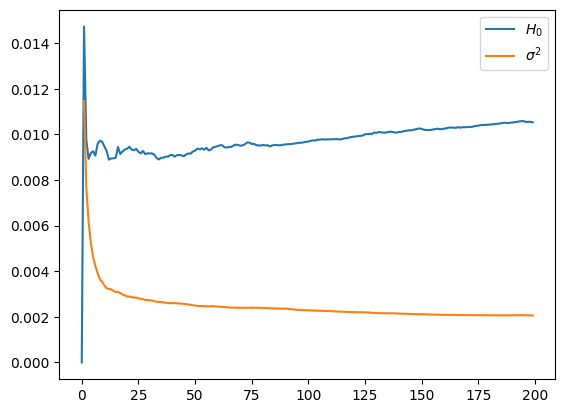

In [45]:
plt.plot(h,label='$H_0$')
plt.plot(sigmas,label='$\sigma^2$')
plt.legend()
plt.show()

In [42]:
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
epsilon = 0.1
T = int((200 * P) / epsilon)

n_s_range = (np.linspace(10,1000,15) // P).astype(int)

h = np.zeros(len(n_s_range))
sigmas = np.zeros(len(n_s_range))


start = time.time()
for i,n_s in enumerate(n_s_range):
    A,mus = GCMC(n_s,N_p,T,epsilon)
    h[i] = H(A[:t],mus[:t]) / (n_s * P)
    sigmas[i] = np.mean(A[:t] ** 2) / (n_s * P)
print(f'Computing time : {time.time() - start} s')

C:\Users\paula\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\paula\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


Computing time : 5.102267503738403 s


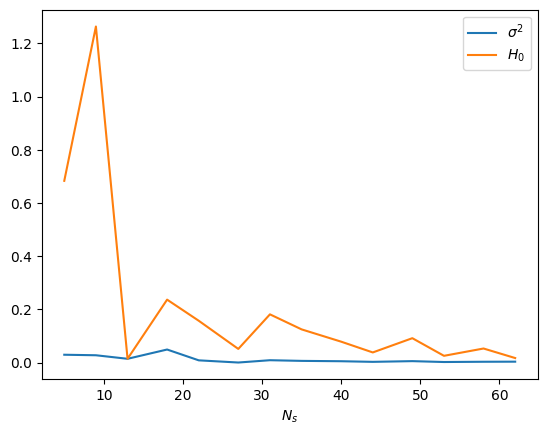

In [43]:
plt.plot(n_s_range,sigmas,label='$\sigma^2$')
plt.plot(n_s_range,h,label='$H_{0}$')
plt.xlabel('$N_{s}$')
plt.legend()
plt.show()

###### 1 Gain de catégories d'investisseurs

In [85]:
def GCMC(N_s,N_p,T,epsilon):
    
    a = np.random.choice([1, -1], size=(N_s, N_p))
    n = np.ones(N_s, dtype=bool)
    omega_mu = np.random.normal(0, np.sqrt(N_p), N_p)
    U = np.zeros(N_s)
    A_spec = np.zeros(T)
    A_tot = np.zeros(T)
    A_prod = np.zeros(T)
    G_spec = np.zeros(T)
    G_prod = np.zeros(T)
    mus = np.zeros(T, dtype=int)
    mus[0] = np.random.randint(N_p) % N_p
    
    for t in range(T - 1):
        
        n = U > 0
        A_spec[t] = np.sum(a[:, mus[t]] * n)
        A_tot[t] = omega_mu[mus[t]] + A_spec[t]
        A_prod[t] = omega_mu[mus[t]]
        
        #n = n & (a[:, mus[t]] * A_tot[t] + epsilon < 0)
        
        mus[t + 1] = (2 * mus[t]) % N_p + (A_spec[t] > 0)
        G_prod[t] = -omega_mu[mus[t]] * A_tot[t]
        G_spec[t] = -A_spec[t] * A_tot[t]
        
        U = U - a[:,mus[t]] * A_tot[t] - epsilon
        
    return A_tot,A_spec,A_prod,G_spec,G_prod,mus 

In [97]:
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
N_s = 100
epsilon = 0.1
T = int((200 * P) / epsilon)


start = time.time()
A_tot,A_spec,A_prod,G_spec,G_prod,mus = GCMC(N_s,N_p,T,epsilon) 
df = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'State':mus})
print(f'Computing time : {time.time() - start} s')

Computing time : 0.48975157737731934 s


In [87]:
N_s_range = np.linspace(50,500,15).astype(int)
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
N_s = 100
epsilon = 0.1
T = int((200 * P) / epsilon)


N_s_spec_gains = []
N_s_prod_gains = []

start = time.time()

for N_s in N_s_range:
    
    A_tot,A_spec,A_prod,G_spec,G_prod,mus = GCMC(N_s,N_p,T,epsilon) 
    df = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'State':mus})

    
    N_s_spec_gains.append(df['G_spec'].mean())
    N_s_prod_gains.append(df['G_prod'].mean())
    
    
print(f'Computing time : {time.time() - start} s')

Computing time : 8.153627395629883 s


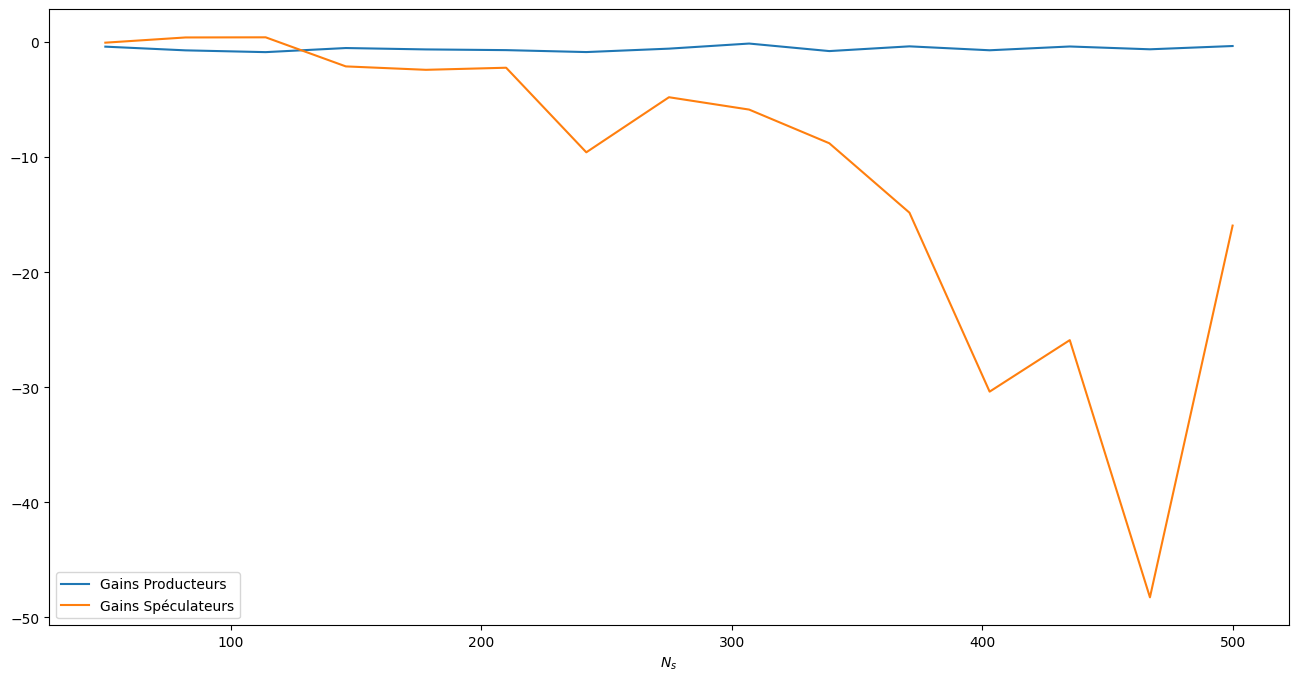

In [88]:
gains = pd.DataFrame({'N_s_spec_gains':N_s_spec_gains,'N_s_prod_gains':N_s_prod_gains},index=N_s_range)

plt.figure(figsize=(16,8))

plt.plot(N_s_range,gains['N_s_prod_gains'],label='Gains Producteurs')
plt.plot(N_s_range,gains['N_s_spec_gains'],label='Gains Spéculateurs')
plt.xlabel('$N_{s}$')
plt.legend()
plt.show()

Plus on a de spéculateurs, plus le gain des spéculateurs diminue et le gain des producteurs s'annule.

In [89]:
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
N_s = 10
epsilon = 0.1
T = int((200 * P) / epsilon)


start = time.time()
A_tot,A_spec,A_prod,G_spec,G_prod,mus = GCMC(N_s,N_p,T,epsilon) 
df = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'State':mus})

print(f'Computing time : {time.time() - start} s')

Computing time : 0.5215709209442139 s


In [100]:
N_p_range = np.linspace(50,500,10).astype(int)
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
N_s = 10
epsilon = 0.1
T = int((200 * P) / epsilon)


N_p_spec_gains = []
N_p_prod_gains = []

start = time.time()

for N_p in N_p_range:
    
    A_tot,A_spec,A_prod,G_spec,G_prod,mus = GCMC(N_s,N_p,T,epsilon) 
    df = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'State':mus})

    
    N_p_spec_gains.append(df['G_spec'].mean())
    N_p_prod_gains.append(df['G_prod'].mean())
    
    
print(f'Computing time : {time.time() - start} s')

Computing time : 4.944794654846191 s


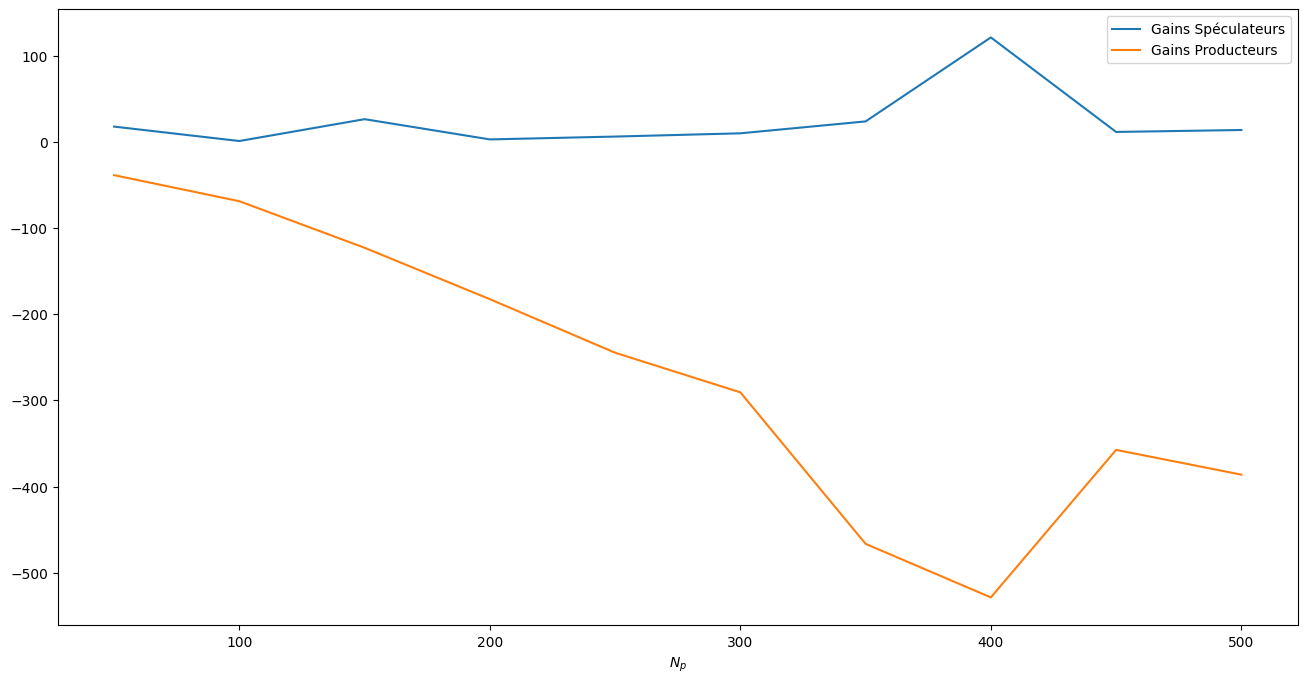

In [101]:
gains = pd.DataFrame({'N_p_spec_gains':N_p_spec_gains,'N_p_prod_gains':N_p_prod_gains},index=N_p_range)

plt.figure(figsize=(16,8))

plt.plot(N_p_range,gains['N_p_spec_gains'],label='Gains Spéculateurs')
plt.plot(N_p_range,gains['N_p_prod_gains'],label='Gains Producteurs')
plt.xlabel('$N_{p}$')
plt.legend()
plt.show()

Les spéculateurs peuvent être considérés comme des prédateurs qui cherchent à tirer profit des fluctuations des prix sur les marchés financiers, tandis que les producteurs sont les proies qui cherchent à maximiser leurs profits en produisant et vendant des biens ou des services.

Dans ce modèle, les spéculateurs peuvent influencer les stratégies des producteurs en achetant ou vendant des actifs, ce qui peut affecter les prix sur le marché. Les producteurs, à leur tour, peuvent réagir aux fluctuations de prix en ajustant leur production en conséquence. Cela peut entraîner une interaction dynamique entre les deux groupes, où les changements dans les stratégies des uns peuvent affecter les stratégies des autres.

###### 2 Gain réel, gain espéré

In [191]:
N_s = 100 #nombre de spéculateurs
M = 4 #nombre de pas
P = 2 ** M
N_p = P #nombre de producteurs
epsilon = 0.01
T = int((200 * P) / epsilon) * 2


start = time.time()
A_tot,A_spec,A_prod,G_spec,G_prod,mus = GCMC(N_s,N_p,T,epsilon) 


print(f"Amplitude :{np.round(max(A_tot))}")
print(f"Standard deviation :{np.round(np.std(A_tot))}\n")


df1 = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'State':mus})



print(f'Computing time : {time.time() - start} s')

Amplitude :31.0
Standard deviation :2.0

Computing time : 7.977416515350342 s


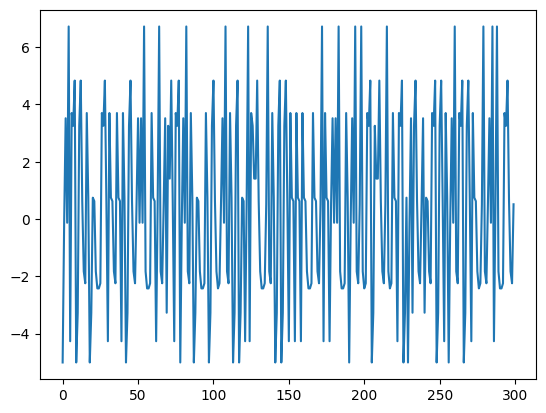

In [192]:
plt.plot(A_prod[:300])

1. Calculer les moyennes conditionnelles $E(A_{total}|\mu)$ pour tous les μ pour une réalisation de ce jeu.

In [195]:
A_tot_means = df1.groupby('State').mean()[['A_tot']].T

In [196]:
A_tot_means

State,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
A_tot,-0.083012,-0.002878,0.083593,0.004733,0.165289,0.056359,-0.001449,0.080201,-0.005987,-0.140545,0.223329,0.026757,0.015504,-0.168263,0.140258,0.556785


2. Créez un agent qui a tout compris du jeu et qui a la possibilité de jouer
exactement $a_{best}(\mu) = -sign(E(A_{total}|\mu)$. Son espérance de gain moyen naive est $\frac{1}{P} \sum_{\mu} |E(A_{total}|\mu)|$

In [208]:
def GCMC_best(a,N_s,N_p,T,epsilon):
    
    n = np.ones(N_s, dtype=bool)
    omega_mu = np.random.normal(0, np.sqrt(N_p), N_p)
    U = np.zeros(N_s)
    A_spec = np.zeros(T)
    A_tot = np.zeros(T)
    A_prod = np.zeros(T)
    G_spec = np.zeros(T)
    G_prod = np.zeros(T)
    a_best_gain = np.zeros(T)
    mus = np.zeros(T, dtype=int)
    mus[0] = np.random.randint(N_p) % N_p
    
    for t in range(T - 1):
        
        n = U > 0
        A_spec[t] = np.sum(a[:, mus[t]] * n)
        A_tot[t] = omega_mu[mus[t]] + A_spec[t]
        A_prod[t] = omega_mu[mus[t]]
        
        mus[t + 1] = (2 * mus[t]) % N_p + (A_spec[t] > 0)
        G_prod[t] = -omega_mu[mus[t]] * A_tot[t]
        G_spec[t] = -A_spec[t] * A_tot[t]
        
        
        a_best_gain[t] = a[-1,mus[t]] * A_tot[t] - epsilon
        U = U - a[:,mus[t]] * A_tot[t] - epsilon
        
    return A_tot,A_spec,A_prod,G_spec,G_prod,mus,a_best_gain

In [209]:
a = np.random.choice([1, -1], size=(N_s, P))
a[-1] = A_tot_means.applymap(lambda x: np.where(x > 0, 1, -1)).values[0] #abest

A_tot,A_spec,A_prod,G_spec,G_prod,mus,a_best_gain = GCMC_best(a,N_s,N_p,T,epsilon)

In [210]:
df2 = pd.DataFrame({
        'A_tot':A_tot,
        'A_spec':A_spec,
        'A_prod':A_prod,
        'G_spec':G_spec,
        'G_prod':G_prod,
        'a_best_gain':a_best_gain,
        'State':mus})

In [224]:
theoritical_gain = np.sum(np.abs(A_tot_means.values[0])) / P
realized_gain = df2['a_best_gain'].mean()
print(f'Le gain moyen espéré de l\'agent qui a tout compris au jeu est {round(theoritical_gain,4)}')
print(f'Le gain moyen réalisé de l\'agent qui a tout compris au jeu est {round(realized_gain,4)}')

Le gain moyen espéré de l'agent qui a tout compris au jeu est 0.1097
Le gain moyen réalisé de l'agent qui a tout compris au jeu est -0.02


On observe le gain moyen